# Исследование факторов, влияющих на баллы сотрудников

Ежегодно сотрудники некоторой компании проходят аттестацию, где по 100-балльной шкале получают оценки за уровень знаний по специальности (erudition_score), за коммуникативные навыки (communication_score) и за уровень продуктивности на работе (productivity).

Каждый год сотрудники могут улучшать свои навыки, проходя подготовительный курс.

Также на результаты влияют и другие факторы (уровень образования и, как ни странно, состав обеда, оценка сотрудника начальником - от А до E, пол сотрудника).

## Цели
#### 1. Понять, как различные факторы (экономические, социальные, личные) влияют на оценки сотрудников на экзаменах 
#### 2. Познакомиться с библиотекой seaborn.
#### 3. Применить линейную регрессию для предсказания среднего балла за экзамены.

Что ещё обсудим:

* как кодировать категориальные признаки
* по какой формуле работает линейная регрессия и как оценивать её качество

#### Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Зафиксируем минимальный балл для прохождения аттестации (экзамена)

In [3]:
passmark = 40

#### Считаем данные из csv файла EmployeesPerformance.csv

* rating - рейтинг успеваемости (группа А - низкий рейтинг, E - высокий)
* old_mean_score - средний балл за экзамен в прошлом году (в долях 1; можно перевести в 100-балльную шкалу умножением на 100)

In [4]:
df = pd.read_csv("EmployeesPerformance2021.csv")

#### Напечатаем первые несколько строк в таблице

In [5]:
df.head()

,gender,level of education,lunch,test preparation course,rating,old_mean_score,erudition_score,communication_score,productivity
0,female,bachelor's degree,standard,none,group B,1.000000,72,74,72
1,female,some college,standard,completed,group C,1.000000,69,88,90
2,female,master's degree,standard,none,group B,0.586667,90,93,95
3,male,associate's degree,free/reduced,none,group A,0.333333,47,44,57
4,male,some college,standard,none,group C,0.643333,76,75,78


#### Выведем на экран размеры полученной таблицы

In [6]:
df.shape

(1000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   level of education       1000 non-null   object 
 2   lunch                    1000 non-null   object 
 3   test preparation course  1000 non-null   object 
 4   rating                   1000 non-null   object 
 5   old_mean_score           1000 non-null   float64
 6   erudition_score          1000 non-null   int64  
 7   communication_score      1000 non-null   int64  
 8   productivity             1000 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


#### Выведем на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [8]:
df.describe()

,old_mean_score,erudition_score,communication_score,productivity
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.642077,66.08900,68.054000,69.169000
std,0.287106,15.16308,15.195657,14.600192
min,0.000000,0.00000,10.000000,17.000000
25%,0.410000,57.00000,57.750000,59.000000
50%,0.668333,66.00000,69.000000,70.000000
75%,0.920000,77.00000,79.000000,79.000000
max,1.000000,100.00000,100.000000,100.000000


Посмотрим на распределение баллов по каждому экзамену.

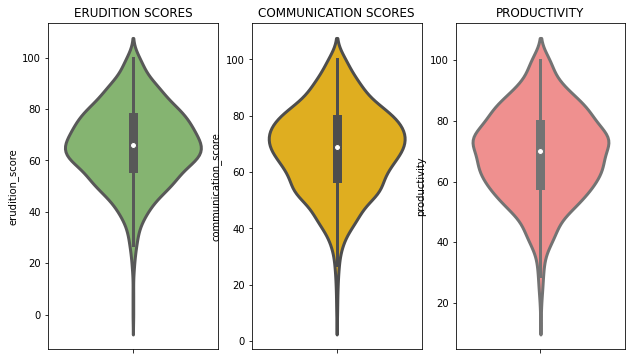

In [9]:
plt.figure(figsize=(14,6))

plt.subplot(1, 4, 1)
plt.title('ERUDITION SCORES')
sns.violinplot(y='erudition_score',data=df,palette='summer',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('COMMUNICATION SCORES')
sns.violinplot(y='communication_score',data=df,palette='Wistia_r',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('PRODUCTIVITY')
sns.violinplot(y='productivity',data=df,palette='spring',linewidth=3)

plt.show()

Из графиков видно, что большинство сотрудников набрали по тестам 60-80 баллов.

#### Проверьте, есть ли в таблице пропущенные значения

In [10]:
df.isnull().sum()

gender                     0
level of education         0
lunch                      0
test preparation course    0
rating                     0
old_mean_score             0
erudition_score            0
communication_score        0
productivity               0
dtype: int64

**Посмотрим, как зависят оценки от того, проходил ли сотрудник курс для подготовки к сдаче экзамена (test preparation course)
и от пола (gender)**

Постройте график (гистограмму, любую нравящуюся вам визуализацию) зависимости оценок за эрудицию (erudition score) от test preparation course и от gender. То же самое - для оценок за communication и productivity.

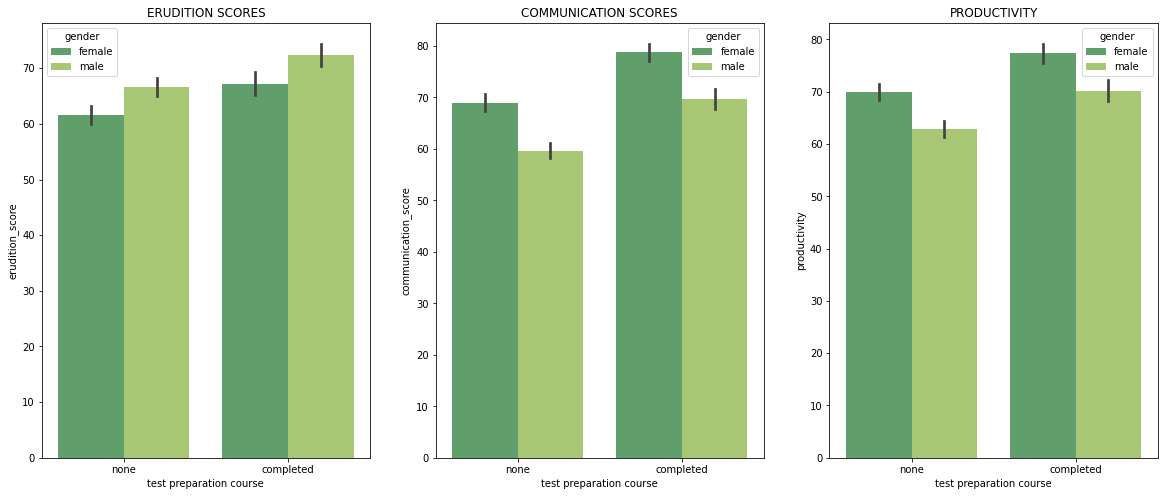

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='erudition_score',data=df,hue='gender',\
           palette='summer')
plt.title('ERUDITION SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='communication_score',data=df,hue='gender',\
           palette='summer')
plt.title('COMMUNICATION SCORES')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='productivity',data=df,hue='gender',\
           palette='summer')
plt.title('PRODUCTIVITY')

plt.show()

Какие выводы можно сделать из этих графиков?

Можно визуализировать все попарные зависимости между числовыми признаками.

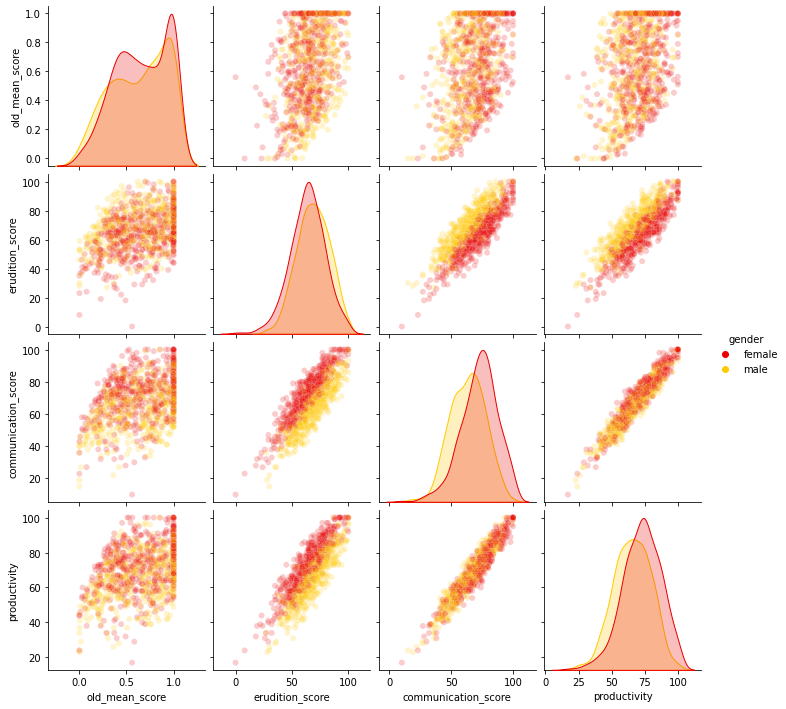

In [12]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

Как влияет lunch на оценки?

Выведем на экран все различные значения из столбца lunch

In [13]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Построим barplot, отражающий зависимость оценок за erudition от test preparation course; сделаем разделение по 'lunch'.
То же самое - для communication и productivity.

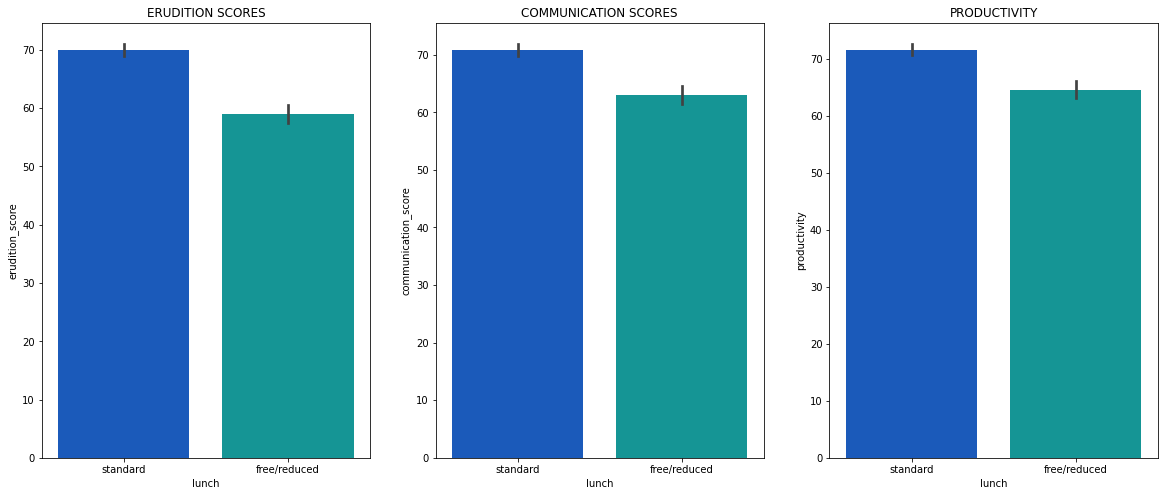

In [14]:
#your code here
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='erudition_score',data=df,\
           palette='winter')
plt.title('ERUDITION SCORES')

plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='communication_score',data=df,\
           palette='winter')
plt.title('COMMUNICATION SCORES')

plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='productivity',data=df,\
           palette='winter')
plt.title('PRODUCTIVITY')

plt.show()

Как зависят баллы от типа lunch?

####  Исследуем оценки за эрудицию (erudition)

Построим гистограмму (sns.countplot) распределения оценок за эрудицию.

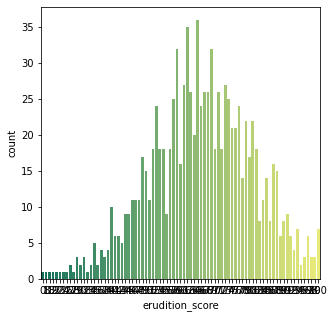

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='erudition_score',data=df,palette='summer')
plt.show()

#### Сколько сотрудников успешно сдали тест на эрудицию?

Создайте новый столбец в таблице df под названием Erudition_PassStatus и запишите в него F, если сотрудник не сдал тест на эрудицию (балл за экзамен < passmark), и P иначе.

Посчитайте количество сотрудников, сдавших и не сдавших экзамен по математике.

In [16]:
#your code here
df['Erudition_PassStatus'] = np.where(df['erudition_score'] < passmark, 'F', 'P')

#or

df['Erudition_PassStatus'] = df['erudition_score'].apply(lambda x: 'F' if x < passmark \
                                              else 'P')

In [17]:
df.Erudition_PassStatus

0      P
1      P
2      P
3      P
4      P
      ..
995    P
996    P
997    P
998    P
999    P
Name: Erudition_PassStatus, Length: 1000, dtype: object

Как зависит успех сдачи экзамена от уровня образования? 

Постройте гистограмму (countplot) распределения сотрудников по уровням образования

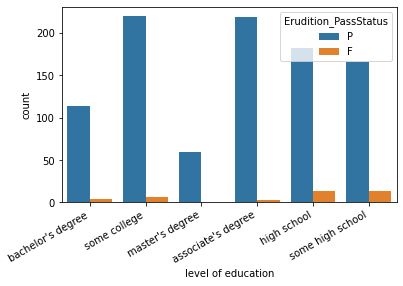

In [18]:
fig,ax=plt.subplots()
sns.countplot(x='level of education',data=df,hue='Erudition_PassStatus')
fig.autofmt_xdate()

#### Сколько сотрудников успешно сдали все экзамены?

Создадим столбец OverAll_PassStatus и запишем в него для каждого сотрудника 'F', если он не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитаем количество сотрудников, которые сдали все экзамены.

In [19]:
df['OverAll_PassStatus'] = df.apply(lambda x: 'P' if x['erudition_score'] >= passmark and \
                                                     x['communication_score'] >= passmark and \
                                                     x['productivity'] >= passmark \
                                         else 'F', axis=1)
df.head()

,gender,level of education,lunch,test preparation course,rating,old_mean_score,erudition_score,communication_score,productivity,Erudition_PassStatus,OverAll_PassStatus
0,female,bachelor's degree,standard,none,group B,1.000000,72,74,72,P,P
1,female,some college,standard,completed,group C,1.000000,69,88,90,P,P
2,female,master's degree,standard,none,group B,0.586667,90,93,95,P,P
3,male,associate's degree,free/reduced,none,group A,0.333333,47,44,57,P,P
4,male,some college,standard,none,group C,0.643333,76,75,78,P,P


Создадим диаграмму, отображающую зависимость OverAll_PassStatus от level of education

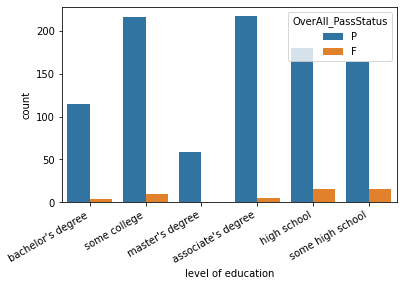

In [20]:
fig,ax=plt.subplots()
sns.countplot(x='level of education',hue='OverAll_PassStatus',data=df)
fig.autofmt_xdate()

#### Найдем распределение средней оценки за все экзамены

Создадим столбец Percentage, в который запишем средний балл сотрудника за все дисциплины.

Нарисуем гистограмму распределения среднего балла.

In [21]:
df['Percentage'] = (df['erudition_score'] + df['communication_score'] + df['productivity']) / 3
df.head()

,gender,level of education,lunch,test preparation course,rating,old_mean_score,erudition_score,communication_score,productivity,Erudition_PassStatus,OverAll_PassStatus,Percentage
0,female,bachelor's degree,standard,none,group B,1.000000,72,74,72,P,P,72.666667
1,female,some college,standard,completed,group C,1.000000,69,88,90,P,P,82.333333
2,female,master's degree,standard,none,group B,0.586667,90,93,95,P,P,92.666667
3,male,associate's degree,free/reduced,none,group A,0.333333,47,44,57,P,P,49.333333
4,male,some college,standard,none,group C,0.643333,76,75,78,P,P,76.333333


**Средний балл в зависимости от уровня образования**

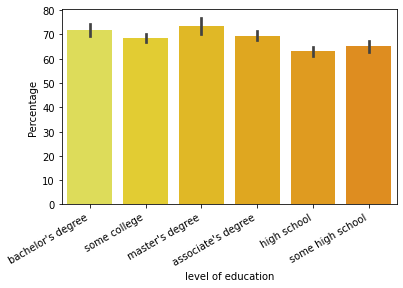

In [22]:
fig,ax=plt.subplots()
sns.barplot(x='level of education',y='Percentage',data=df,palette='Wistia')
fig.autofmt_xdate()

Посмотрим на лучших сотрудников

In [23]:
df[(df['erudition_score'] > 90) & (df['communication_score'] > 90) & (df['productivity']>90)]\
.sort_values(by=['Percentage'],ascending=False)

,gender,level of education,lunch,test preparation course,rating,old_mean_score,erudition_score,communication_score,productivity,Erudition_PassStatus,OverAll_PassStatus,Percentage
962,female,associate's degree,standard,none,group E,1.000000,100,100,100,P,P,100.000000
458,female,bachelor's degree,standard,none,group E,0.700000,100,100,100,P,P,100.000000
916,male,bachelor's degree,standard,completed,group E,0.850000,100,100,100,P,P,100.000000
114,female,bachelor's degree,standard,completed,group E,0.726667,99,100,100,P,P,99.666667
179,female,some high school,standard,completed,group D,1.000000,97,100,100,P,P,99.000000
712,female,some college,standard,none,group D,0.790000,98,99,100,P,P,99.000000
625,male,some college,standard,completed,group D,0.696667,100,99,97,P,P,98.666667
165,female,bachelor's degree,standard,completed,group C,0.526667,96,100,100,P,P,98.666667
903,female,bachelor's degree,free/reduced,completed,group D,0.856667,93,100,100,P,P,97.666667
149,male,associate's degree,free/reduced,completed,group E,1.000000,100,93,100,P,P,97.666667


# Машинное обучение

Закодируем категориальные признаки с помощью OneHot-кодирования:

![title](OHEnc.png)

Закодируем с помощью OneHotEncoding категориальные признаки

In [24]:
base = pd.get_dummies(df, columns=['gender','rating','level of education','test preparation course',\
                                  'lunch'], drop_first=True, dtype = int)
base.sample()
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   old_mean_score                        1000 non-null   float64
 1   erudition_score                       1000 non-null   int64  
 2   communication_score                   1000 non-null   int64  
 3   productivity                          1000 non-null   int64  
 4   Erudition_PassStatus                  1000 non-null   object 
 5   OverAll_PassStatus                    1000 non-null   object 
 6   Percentage                            1000 non-null   float64
 7   gender_male                           1000 non-null   int32  
 8   rating_group B                        1000 non-null   int32  
 9   rating_group C                        1000 non-null   int32  
 10  rating_group D                        1000 non-null   int32  
 11  rating_group E    

In [25]:
base.head()

,old_mean_score,erudition_score,communication_score,productivity,Erudition_PassStatus,OverAll_PassStatus,Percentage,gender_male,rating_group B,rating_group C,rating_group D,rating_group E,level of education_bachelor's degree,level of education_high school,level of education_master's degree,level of education_some college,level of education_some high school,test preparation course_none,lunch_standard
0,1.000000,72,74,72,P,P,72.666667,0,1,0,0,0,1,0,0,0,0,1,1
1,1.000000,69,88,90,P,P,82.333333,0,0,1,0,0,0,0,0,1,0,0,1
2,0.586667,90,93,95,P,P,92.666667,0,1,0,0,0,0,0,1,0,0,1,1
3,0.333333,47,44,57,P,P,49.333333,1,0,0,0,0,0,0,0,0,0,1,0
4,0.643333,76,75,78,P,P,76.333333,1,0,1,0,0,0,0,0,1,0,1,1


## Решим задачу регрессии: предскажем средний балл каждого сотрудника.

## Создадим обучающую матрицу и столбец с целевой переменной.

Создайте матрицу признаков X, состоящую только из закодированных признаков.

Создайте целевой вектор y, равный столбцу Percentage.

In [26]:
y = df['Percentage']

X = base.copy()
X.drop(['erudition_score','communication_score','productivity','Erudition_PassStatus','OverAll_PassStatus','Percentage'], axis=1, inplace=True)

In [27]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: Percentage, dtype: float64

In [28]:
X.head()

,old_mean_score,gender_male,rating_group B,rating_group C,rating_group D,rating_group E,level of education_bachelor's degree,level of education_high school,level of education_master's degree,level of education_some college,level of education_some high school,test preparation course_none,lunch_standard
0,1.000000,0,1,0,0,0,1,0,0,0,0,1,1
1,1.000000,0,0,1,0,0,0,0,0,1,0,0,1
2,0.586667,0,1,0,0,0,0,0,1,0,0,1,1
3,0.333333,1,0,0,0,0,0,0,0,0,0,1,0
4,0.643333,1,0,1,0,0,0,0,0,1,0,1,1


Разобъем данные на тренировочную и тестовую части.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

In [43]:
train_x.shape, test_x.shape

((750, 13), (250, 13))

## Будем использовать модель линейной регрессии

![title](LR.png)

Предсказание делается по формуле - сумма признаков с весами:
    
 $y = w_0 + w_1\cdot x_1 + w_2\cdot x_2 + ...$

Объявим модель и обучим её на тренировочных данных.

In [44]:
model = LinearRegression()
model.fit(train_x,train_y) # обучаем модель

LinearRegression()

Сделаем предсказание на тестовых данных и оценим качество.

In [45]:
target = model.predict(test_x) # делаем предсказание целевой переменной с помощью модели

mean_squared_error(target,test_y) ** 0.5

11.242666336531014

Как интерпретировать эту ошибку?

Посмотрим глазами на предсказания.

In [46]:
for i in range(10):
    print('answer:', test_y.values[i])
    print('predicted:', target[i])
    print()

answer: 85.66666666666667
predicted: 72.95211444517273

answer: 34.666666666666664
predicted: 55.25652814412823

answer: 67.33333333333333
predicted: 66.05146073006179

answer: 70.33333333333333
predicted: 64.37774335895656

answer: 65.0
predicted: 60.75547291472479

answer: 90.33333333333333
predicted: 76.92428336312267

answer: 82.33333333333333
predicted: 81.27587197205705

answer: 49.0
predicted: 72.55791536624159

answer: 61.666666666666664
predicted: 46.19608232106637

answer: 86.66666666666667
predicted: 79.92743186402343



Запишем формулу для предсказания:

$$y = 55 + 17\cdot old\_mean\_score - 3.4\cdot gender\_male + 2\cdot group\_B + 5.6\cdot group\_C + 7.2\cdot group\_D + 3.3\cdot group\_E - 4.8\cdot bachelor + 3.9\cdot high\_school - 0.7\cdot master - 3.5\cdot college - 6.3\cdot some\_high\_school + 7.7\cdot preparation\_course\_none$$

In [47]:
model.coef_, model.intercept_, X.columns

(array([15.86617488, -3.39615698,  0.31529618,  1.84146677,  4.41465835,
         6.07779988,  3.8040169 , -3.595721  ,  4.90599413, -1.2469002 ,
        -5.24712452, -6.79758694,  8.13999426]),
 56.67513626185446,
 Index(['old_mean_score', 'gender_male', 'rating_group B', 'rating_group C',
        'rating_group D', 'rating_group E',
        'level of education_bachelor's degree',
        'level of education_high school', 'level of education_master's degree',
        'level of education_some college',
        'level of education_some high school', 'test preparation course_none',
        'lunch_standard'],
       dtype='object'))

Визуализируем коэффициенты.

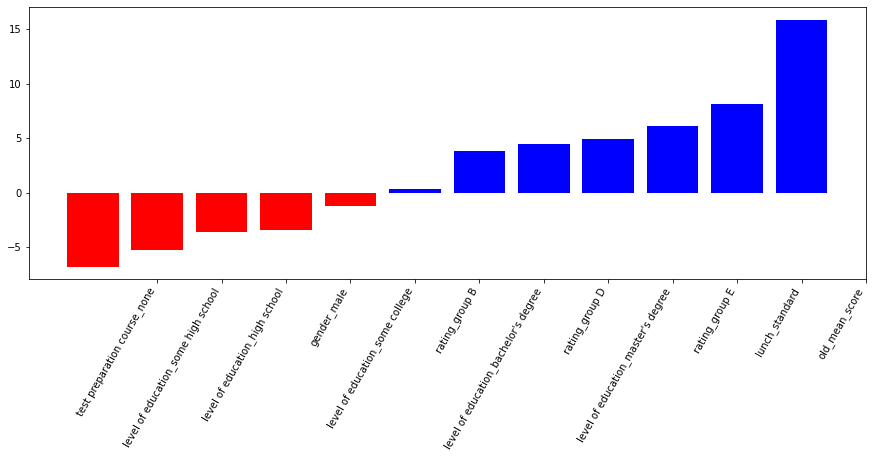

In [48]:
def visualize_coefficients(model, feature_names, n_features=6):
    coef = model.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_features:]
    negative_coefficients = np.argsort(coef)[:n_features]
    all_coefs = np.hstack([negative_coefficients, positive_coefficients])

    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[all_coefs]]
    plt.bar(np.arange(2*n_features), coef[all_coefs], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1+2*n_features), feature_names[all_coefs], rotation=60, ha="right")

    
visualize_coefficients(model, X.columns.values)